# Loading the Iris Dataset

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

#Load dataset
iris = load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

# Display the first few rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [5]:
df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

# Performing Descriptive Statistics

# Mean

In [51]:
print("Mean:\n", df.mean())

Mean:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64


# Median

In [55]:
print("\nMedian:\n", df.median())


Median:
 sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
target               1.00
dtype: float64


# Mode

In [58]:
print("\nMode:\n", df.mode().iloc[0])


Mode:
 sepal length (cm)    5.0
sepal width (cm)     3.0
petal length (cm)    1.4
petal width (cm)     0.2
target               0.0
Name: 0, dtype: float64


# standard deviation

In [61]:
print("\nStandard Deviation:\n", df.std())


Standard Deviation:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64


# Variance

In [64]:
print("\nVariance:\n", df.var())


Variance:
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
target               0.671141
dtype: float64


# Additional descriptive statistics

# Range

In [68]:
print("\nRange:\n", df.max() - df.min())


Range:
 sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
target               2.0
dtype: float64


# Skewness

In [70]:
print("\nSkewness:\n", df.skew())


Skewness:
 sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
target               0.000000
dtype: float64


# kurtosis

In [76]:
print("\nKurtosis:\n", df.kurt())


Kurtosis:
 sepal length (cm)   -0.552064
sepal width (cm)     0.228249
petal length (cm)   -1.402103
petal width (cm)    -1.340604
target              -1.510135
dtype: float64


# Performing Inferential Statistics

In [91]:
from scipy import stats

# Example data: Sepal length values
sep_length = df['sepal length (cm)']

# Hypothetical population mean for Sepal length
population_mean = 0.05

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(sep_length, population_mean)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 85.68585344251181
P-Value: 1.1689659678846205e-128


# Confidence Intervals

In [93]:
import numpy as np
from scipy import stats

# Sample mean and standard error for Sepal length
sample_mean = np.mean(sep_length)
standard_error = stats.sem(sep_length)

# 95% Confidence interval

In [95]:
# Compute 95% confidence interval for Sepal length
confidence_interval = stats.norm.interval(0.95, loc=sample_mean, scale=standard_error)

print(f"95% Confidence Interval for Sepal length: {confidence_interval}")

95% Confidence Interval for Sepal length: (5.710817588579892, 5.9758490780867755)


# 99% Confidence Interval

In [97]:
# Compute 99% confidence interval for Sepal length
confidence_interval = stats.norm.interval(0.99, loc=sample_mean, scale=standard_error)

print(f"99% Confidence Interval for Sepal length: {confidence_interval}")

99% Confidence Interval for Sepal length: (5.669178123742774, 6.017488542923894)


# Regression Analysis

In [99]:
import statsmodels.api as sm

# Define independent variable (add constant for intercept)
X = sm.add_constant(df['sepal length (cm)'])

# Define dependent variable
y = df['sepal width (cm)']

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       sepal width (cm)   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Sun, 08 Sep 2024   Prob (F-statistic):              0.152
Time:                        08:23:41   Log-Likelihood:                -86.732
No. Observations:                 150   AIC:                             177.5
Df Residuals:                     148   BIC:                             183.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.4189      0.25

# Visualization Analysis

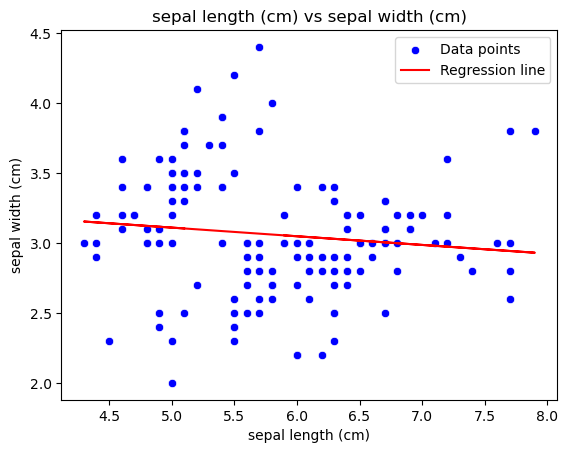

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df, color='blue',label='Data points')
plt.plot(df['sepal length (cm)'], model.predict(X), color='red',label='Regression line')
plt.title('sepal length (cm) vs sepal width (cm)')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()